In [43]:
import numpy as np
import meshio # pip install meshio

class triangulation2DFEM(object):
    def __init__(self, Coordinates, Elements, BoundaryList=None, BoundaryFlag=None, DirichletFlag=None, NeumannFlag=None):
        
        self.Coordinates = np.asarray(Coordinates, dtype=np.float64)
        self.Elements = self.x = np.asarray(Elements, dtype=np.float64)
        self.NN = np.size(Coordinates,0)
        self.NE = np.size(Elements,0)
        
        # Obtain list of edges
        TempAllEdges = np.array([np.concatenate((Elements[:,1],Elements[:,2], Elements[:,0]) ), np.concatenate((Elements[:,2],Elements[:,0], Elements[:,1]) )]).T
        TempEdges = np.array([np.amin(TempAllEdges, axis =1),np.amax(TempAllEdges, axis = 1)]).T
        MinEdges, indices, inverse, counts = np.unique(TempEdges, axis=0, return_index =True, return_inverse=True, return_counts=True)
        Ne = np.size(MinEdges,0)
        
        # Connectivity for edges
        EleEdges = inverse.reshape((self.NE,3), order ='F')
        
        self.Edges = MinEdges
        self.Ne = np.size(self.Edges,0)
        self.EleEdges = EleEdges
        
        BEi = np.where((counts==1))[0]
        BEdges = MinEdges[BEi,:]
        BEdgesraw = TempAllEdges[indices[BEi],:]
        
        if BoundaryList is not None:
            BoundaryListsort = np.sort(BoundaryList)
            tempsort = BoundaryListsort[:,0].argsort()
            Btemp = np.unique(BoundaryListsort[tempsort], axis=0)
            if np.array_equal(Btemp,BEdges): 
                BoundaryListEdgesIndex = BEi[np.argsort(tempsort)]
                self.BoundaryEdges = BoundaryList
                self.BoundaryEdgesindex = BoundaryListEdgesIndex
            else:
                raise ValueError('Error in construction of Edges')
            # end
        else:
            self.BoundaryEdges = BEdgesraw
            self.BoundaryEdgesIndex = BEi
        # end
                
        if BoundaryFlag is not None:
            self.BoundaryFlag = BoundaryFlag
        else:
            self.BoundaryFlag = None
        # end
        if DirichletFlag is not None:
            self.DirichletFlag = DirichletFlag
            
        else:
            self.DirichletFlag = None
        # end
        if NeumannFlag is not None:
            self.NeumannFlag = NeumannFlag
        else:
            self.NeumannFlag = None
        # end
    # end __init__
# end class
        
# read meshes created with gmsh .msh files
def readmesh(filename):
    Thgmsh = meshio.read(filename+'.msh')
    #print(Thgmsh.__dict__)
    Coordinates = Thgmsh.points
    Elements = Thgmsh.cells['triangle']
    BoundaryList = Thgmsh.cells['line']
    BoundaryFlag = None
    if 'gmsh:physical' in Thgmsh.cell_data['line']:
        BoundaryFlag = Thgmsh.cell_data['line']['gmsh:physical']
        if 'Dirichlet' in Thgmsh.field_data:
            DirichletFlag = Thgmsh.field_data['Dirichlet'][0]
            #print('Dirichlet flag in mesh BoundaryFlag is: ', DirichletFlag)
        if 'Neumann' in Thgmsh.field_data: 
            NeumannFlag = Thgmsh.field_data['Neumann'][0]
    # end if
    #Th = triangulation2DFEM(Coordinates, Elements, BoundaryList, BoundaryFlag, DirichletFlag, NeumannFlag)
    Th = triangulation2DFEM(Coordinates, Elements)
    return Th
    
    
def plotgmsh(points, cells):
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10,10))
    plt.triplot(points[:,0], points[:,1], triangles= cells)
    plt.gca().set_aspect("equal", "datalim")
    plt.axis("off")

    plt.show()
    #plt.savefig(filename, transparent=True)
    return
def plotboundarygmsh(points, Boundary):
    import matplotlib.pyplot as plt
    fig,ax = plt.subplots(figsize=(10,10))
    for j in range(np.size(Boundary,0)):
        ax.plot(points[Boundary[j,0:2],0], points[Boundary[j,0:2],1],'k')
        #plt.pause(0.5)
    fig.gca().set_aspect("equal", "datalim")
    ax.axis('off')
    plt.show()
                        

Dir None


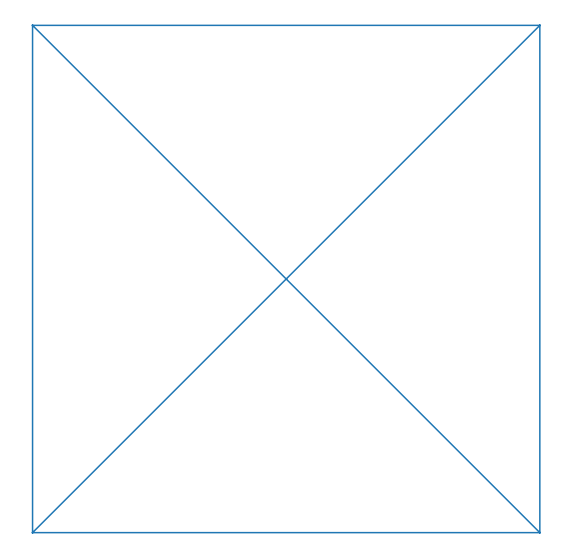

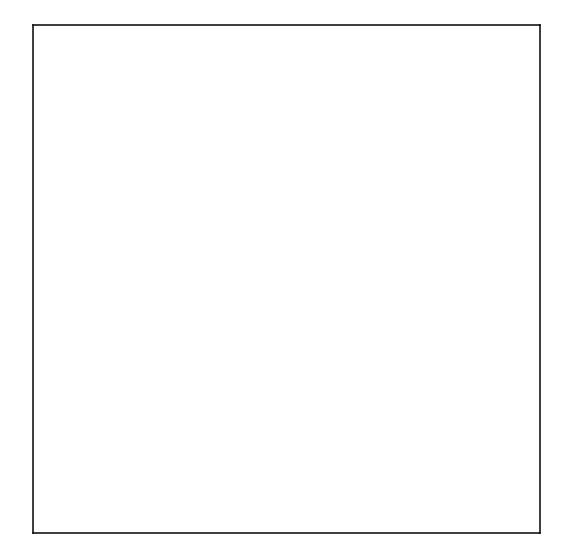

In [38]:

# Simple mesh
X = np.array([[0,0],[1,0],[0.5,0.5],[0,1],[1,1]])
Ele = np.array([[0,1,2],[0,2,3],[1,4,2],[2,4,3]])

Th = triangulation2DFEM(X, Ele)
# plot the mesh
plotgmsh(Th.Coordinates, Th.Elements)
# Plot of the boundary
plotboundarygmsh(Th.Coordinates,Th.BoundaryEdges)

Boundary [[4 6]
 [6 5]
 [5 7]
 [7 0]
 [0 1]
 [1 2]
 [2 3]
 [3 4]]
BF [2 2 2 2 2 1 1 2]
Dirichlet flag in mesh BoundaryFlag is:  1
Dir None


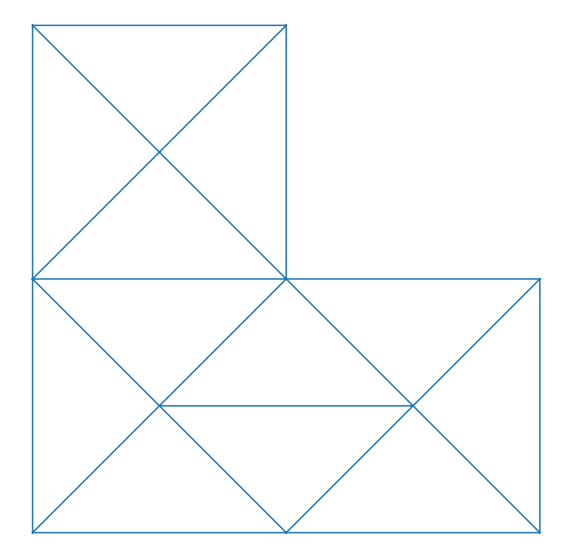

Boundary [[ 4  6]
 [ 6  7]
 [ 7  8]
 [ 8  5]
 [ 5  9]
 [ 9 10]
 [10 11]
 [11  0]
 [ 0 12]
 [12  1]
 [ 1 13]
 [13  2]
 [ 2 14]
 [14  3]
 [ 3 15]
 [15  4]]
BF [2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2]
Dirichlet flag in mesh BoundaryFlag is:  1
Dir None


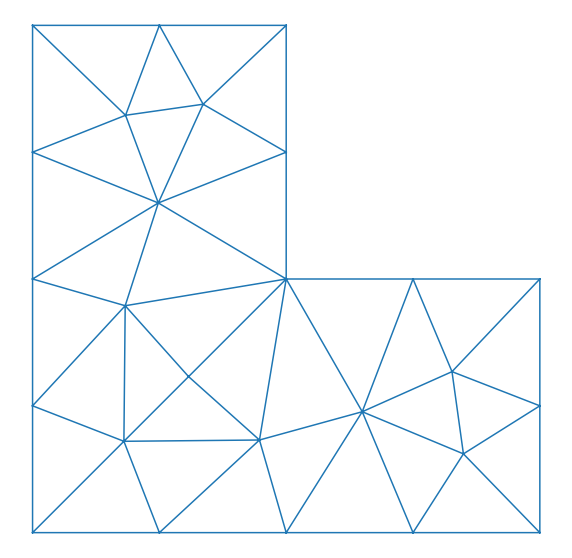

Boundary [[ 4  6]
 [ 6  7]
 [ 7  8]
 [ 8  9]
 [ 9 10]
 [10 11]
 [11 12]
 [12  5]
 [ 5 13]
 [13 14]
 [14 15]
 [15 16]
 [16 17]
 [17 18]
 [18 19]
 [19  0]
 [ 0 20]
 [20 21]
 [21 22]
 [22  1]
 [ 1 23]
 [23 24]
 [24 25]
 [25  2]
 [ 2 26]
 [26 27]
 [27 28]
 [28  3]
 [ 3 29]
 [29 30]
 [30 31]
 [31  4]]
BF [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 2 2 2 2]
Dirichlet flag in mesh BoundaryFlag is:  1
Dir None


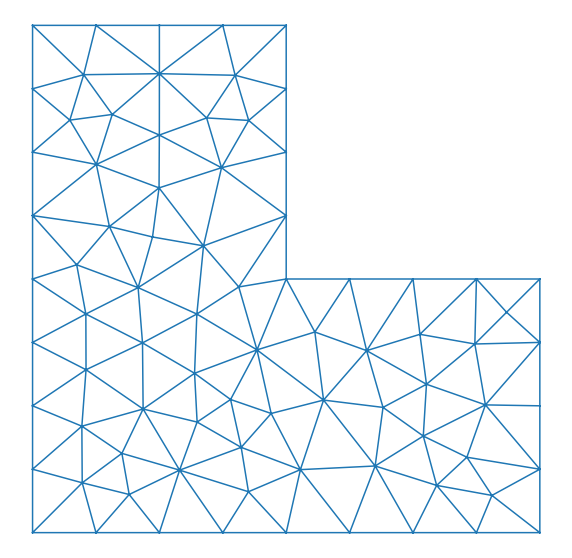

Boundary [[ 4  6]
 [ 6  7]
 [ 7  8]
 [ 8  9]
 [ 9 10]
 [10 11]
 [11 12]
 [12 13]
 [13 14]
 [14 15]
 [15 16]
 [16 17]
 [17 18]
 [18 19]
 [19 20]
 [20  5]
 [ 5 21]
 [21 22]
 [22 23]
 [23 24]
 [24 25]
 [25 26]
 [26 27]
 [27 28]
 [28 29]
 [29 30]
 [30 31]
 [31 32]
 [32 33]
 [33 34]
 [34 35]
 [35  0]
 [ 0 36]
 [36 37]
 [37 38]
 [38 39]
 [39 40]
 [40 41]
 [41 42]
 [42  1]
 [ 1 43]
 [43 44]
 [44 45]
 [45 46]
 [46 47]
 [47 48]
 [48 49]
 [49  2]
 [ 2 50]
 [50 51]
 [51 52]
 [52 53]
 [53 54]
 [54 55]
 [55 56]
 [56  3]
 [ 3 57]
 [57 58]
 [58 59]
 [59 60]
 [60 61]
 [61 62]
 [62 63]
 [63  4]]
BF [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2]
Dirichlet flag in mesh BoundaryFlag is:  1
Dir None


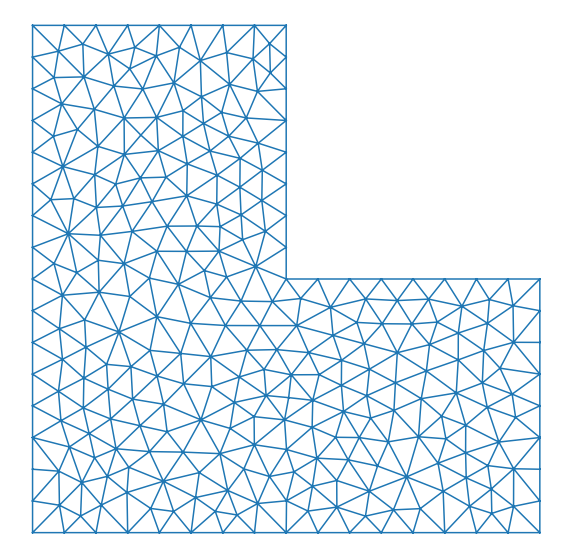

Boundary [[  4   6]
 [  6   7]
 [  7   8]
 [  8   9]
 [  9  10]
 [ 10  11]
 [ 11  12]
 [ 12  13]
 [ 13  14]
 [ 14  15]
 [ 15  16]
 [ 16  17]
 [ 17  18]
 [ 18  19]
 [ 19  20]
 [ 20  21]
 [ 21  22]
 [ 22  23]
 [ 23  24]
 [ 24  25]
 [ 25  26]
 [ 26  27]
 [ 27  28]
 [ 28  29]
 [ 29  30]
 [ 30  31]
 [ 31  32]
 [ 32  33]
 [ 33  34]
 [ 34   5]
 [  5  35]
 [ 35  36]
 [ 36  37]
 [ 37  38]
 [ 38  39]
 [ 39  40]
 [ 40  41]
 [ 41  42]
 [ 42  43]
 [ 43  44]
 [ 44  45]
 [ 45  46]
 [ 46  47]
 [ 47  48]
 [ 48  49]
 [ 49  50]
 [ 50  51]
 [ 51  52]
 [ 52  53]
 [ 53  54]
 [ 54  55]
 [ 55  56]
 [ 56  57]
 [ 57  58]
 [ 58  59]
 [ 59  60]
 [ 60  61]
 [ 61  62]
 [ 62  63]
 [ 63   0]
 [  0  64]
 [ 64  65]
 [ 65  66]
 [ 66  67]
 [ 67  68]
 [ 68  69]
 [ 69  70]
 [ 70  71]
 [ 71  72]
 [ 72  73]
 [ 73  74]
 [ 74  75]
 [ 75  76]
 [ 76  77]
 [ 77   1]
 [  1  78]
 [ 78  79]
 [ 79  80]
 [ 80  81]
 [ 81  82]
 [ 82  83]
 [ 83  84]
 [ 84  85]
 [ 85  86]
 [ 86  87]
 [ 87  88]
 [ 88  89]
 [ 89  90]
 [ 90  91]
 [ 91   2]
 

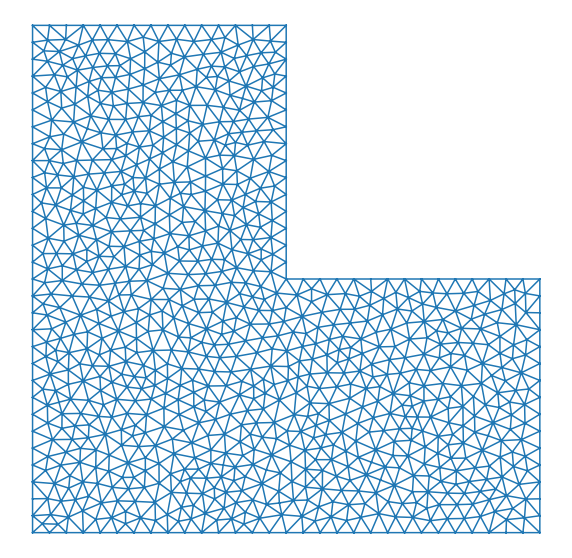

In [39]:
Th_L = readmesh('Lshapeddomain1')
# plot the mesh
plotgmsh(Th_L.Coordinates, Th_L.Elements)
Th_L = readmesh('Lshapeddomain2')
# plot the mesh
plotgmsh(Th_L.Coordinates, Th_L.Elements)
Th_L = readmesh('Lshapeddomain3')
# plot the mesh
plotgmsh(Th_L.Coordinates, Th_L.Elements)
Th_L = readmesh('Lshapeddomain4')
# plot the mesh
plotgmsh(Th_L.Coordinates, Th_L.Elements)
Th_L = readmesh('Lshapeddomain5')
# plot the mesh
plotgmsh(Th_L.Coordinates, Th_L.Elements)
# Plot of the boundary
#plotboundarygmsh(Th_L.Coordinates,Th_L.BoundaryEdges)

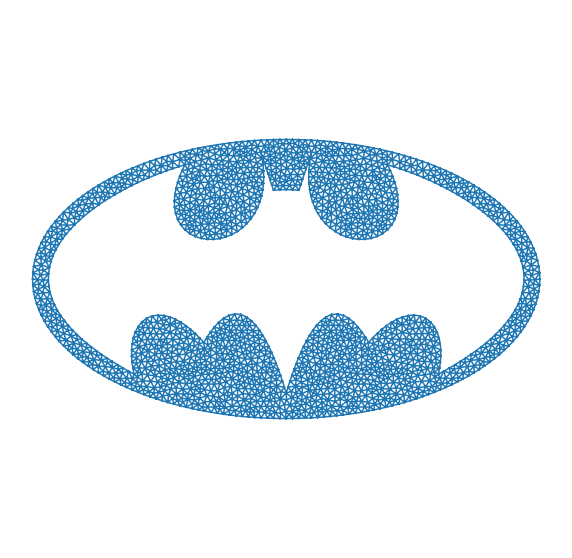

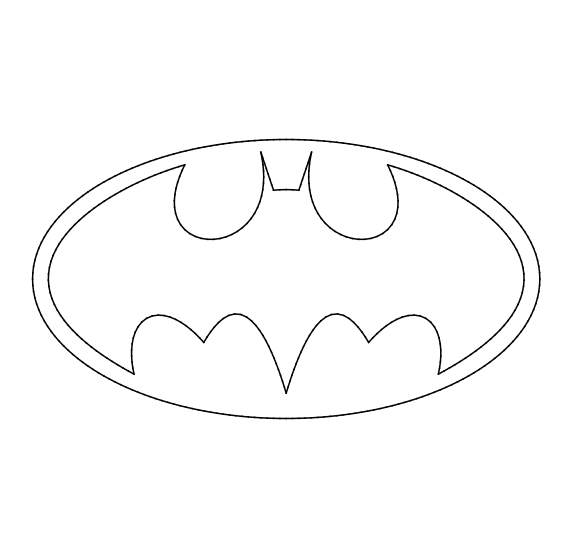

In [5]:
# Batman mesh
Th = readmesh('batman2')
# plot the mesh
plotgmsh(Th.Coordinates, Th.Elements)
# Plot of the boundary
plotboundarygmsh(Th.Coordinates,Th.BoundaryEdges)

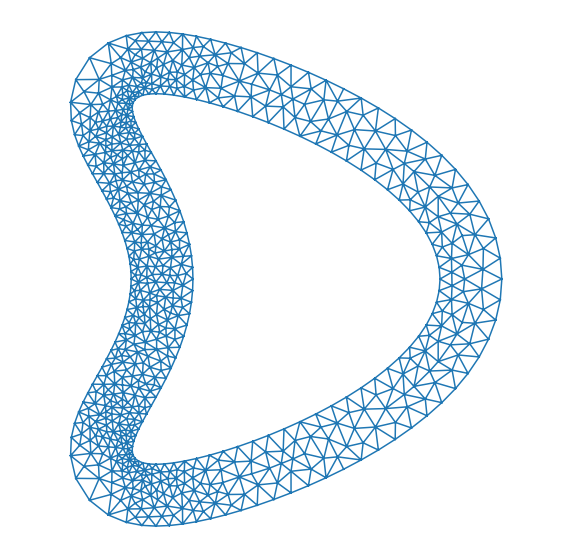

In [47]:
# kite mesh
#Th_kite = readmesh('kite_e02')
#Th_kite = readmesh('kite_e02_fine')
#Th_kite = readmesh('kite_e03')
#Th_kite = readmesh('kite_e03_fine')
#Th_kite = readmesh('kite_e04')
#Th_kite = readmesh('kite_e04_fine')
Th_kite = readmesh('kite_e05')
#Th_kite = readmesh('kite_e05_fine')
# plot the mesh
plotgmsh(Th_kite.Coordinates, Th_kite.Elements)

# Plot of the boundary
#plotboundarygmsh(Th_kite.Coordinates,Th_kite.BoundaryEdges)